In [1]:
import pandas as pd
import seaborn as sn
import matplotlib as plot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
connections = pd.read_csv('connections.csv')

In [3]:
connections.head()

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Ashwathy,Rameshan,NaN,Syracuse University,Computer Science Grader,9-Sep-22
1,Sohaib Abid,Khan,NaN,AlmaneaCo,Procurement Specialist,8-Sep-22
2,Sharifah Salwa,Mohd Jafri,NaN,Pactera EDGE,Project Associate,7-Sep-22
3,Sara,Shahid,NaN,British Council,Exams Venue Staff,7-Sep-22
4,Mohammad Moneer,Nawabi,NaN,U.S. Department of State,Project Manager,4-Sep-22


In [4]:
connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     306 non-null    object
 1   Last Name      306 non-null    object
 2   Email Address  4 non-null      object
 3   Company        296 non-null    object
 4   Position       296 non-null    object
 5   Connected On   313 non-null    object
dtypes: object(6)
memory usage: 14.8+ KB


In [5]:
connections['Connected On'] = pd.to_datetime(connections['Connected On'])

In [6]:
connections_per_date =connections.groupby('Connected On',as_index=False).size()

In [7]:
connections_per_date

,Connected On,size
0,2017-03-01,10
1,2017-03-02,3
2,2017-03-04,1
3,2017-03-09,1
4,2017-03-10,1
...,...,...
107,2022-09-03,2
108,2022-09-04,1
109,2022-09-07,2
110,2022-09-08,1


In [50]:
df_date = pd.DataFrame(connections_per_date)

In [51]:
most_nums = df_date[df_date['Connected On'].between('2020-01-01', '2020-05-01')]

In [61]:
df_date_1 = df_date[df_date['Connected On'].between('2017-03-01', '2020-01-10')]

In [53]:
df_date_2 = df_date[df_date['Connected On'].between('2020-05-01', '2022-09-09')]

In [48]:
# df_date = df_date.drop(most_nums.index)

,Connected On,size
0,2017-03-01,10
1,2017-03-02,3
2,2017-03-04,1
3,2017-03-09,1
4,2017-03-10,1
...,...,...
107,2022-09-03,2
108,2022-09-04,1
109,2022-09-07,2
110,2022-09-08,1


Text(0, 0.5, 'New Connections')

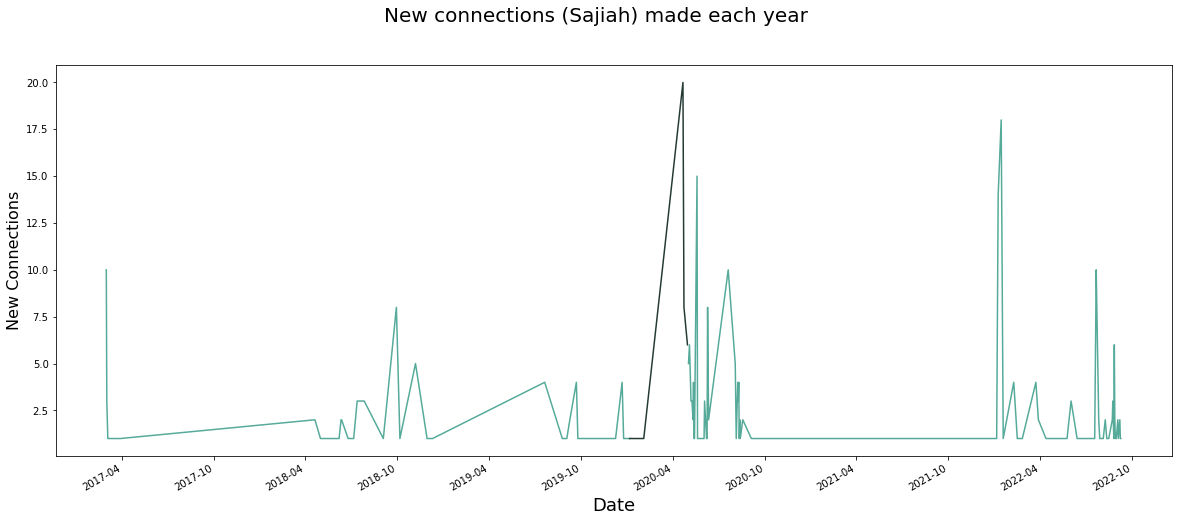

In [196]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20, 8))
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

# Same as above
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.plot(df_date_1['Connected On'], df_date_1['size'], color = '#55aa99')
ax.plot(most_nums['Connected On'], most_nums['size'], color = '#243a35')
ax.plot(df_date_2['Connected On'], df_date_2['size'], color = '#55aa99')

# Rotates and right aligns the x labels. 
# Also moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()
fig.suptitle('New connections (Sajiah) made each year', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('New Connections', fontsize=16)

In [20]:
df = pd.DataFrame(connections_per_date)

In [24]:
df[df['Connected On'].between('2020-04-01', '2020-10-01')]

,Connected On,size
41,2020-04-21,20
42,2020-04-23,8
43,2020-04-30,6
44,2020-05-02,5
45,2020-05-04,6
46,2020-05-07,3
47,2020-05-09,3
48,2020-05-11,2
49,2020-05-12,4
50,2020-05-13,1


In [9]:
invitations = pd.read_csv('Invitations.csv')

In [10]:
invitations.head()

,From,To,Sent At,Message,Direction
0,Sajiah Naqib,Aatif Belal,"8/26/22, 8:56 PM",NaN,OUTGOING
1,Sajiah Naqib,Pranav Reddy,"8/26/22, 5:27 PM",NaN,OUTGOING
2,Sajiah Naqib,Smitha Ithal,"8/26/22, 5:28 PM",NaN,OUTGOING
3,Sajiah Naqib,Janani Hemachandran,"8/25/22, 5:07 PM",NaN,OUTGOING
4,Sajiah Naqib,Madhura Anand,"8/24/22, 8:19 AM",NaN,OUTGOING


In [11]:
def change_wording(x):
    if x == 'OUTGOING':
        return "Sent"
    else:
        return "Received"

invitations['Direction'] = invitations['Direction'].apply(change_wording)

In [12]:
invitations_type =invitations.groupby('Direction',as_index=False).size()

In [13]:
invitations_type

,Direction,size
0,Received,58
1,Sent,10


In [14]:
x = invitations_type['Direction'].to_list()
y = invitations_type['size'].to_list()

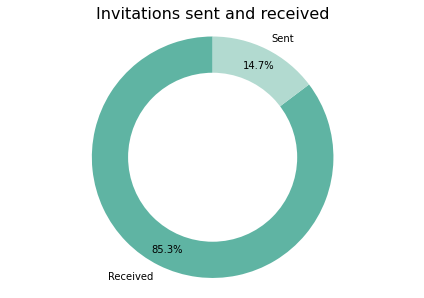

In [141]:

# #add colors
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# directions = invitations['Direction'].value_counts().to_dict()
# x = list(directions.values())
# labels = directions.keys()
fig1, ax1 = plt.subplots()
# ax1.pie(x, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90,colors=colors,radius=1800)
# ax1.axis('equal')
# plt.title('Invitations sent and received')
# plt.show()

# Pie chart
labels = x
sizes = y
#colors
colors = ['#5fb4a3','#b2dad0','#99ff99','#ffcc99']

 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Invitations sent and received', fontsize=16)
plt.show()

In [77]:
reactions = pd.read_csv('Reactions.csv')

In [78]:
reactions.head(5)

,Date,Type,Link
0,2022-09-11 02:49:29,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
1,2022-09-10 14:17:11,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
2,2022-09-10 14:17:04,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
3,2022-09-10 14:16:54,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
4,2022-09-10 04:03:25,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...


In [127]:
reactions_get_type = reactions.groupby('Type').size()

In [128]:
reactions_get_type

Type
APPRECIATION       1
EMPATHY           33
ENTERTAINMENT      1
INTEREST           1
LIKE             225
PRAISE            29
dtype: int64

In [131]:
reactions['Date'] = pd.to_datetime(reactions['Date'])
ent = reactions.query("Type == 'ENTERTAINMENT'").index
reactions = reactions.drop(ent)

Text(0.5, 1.0, 'Reactions by type')

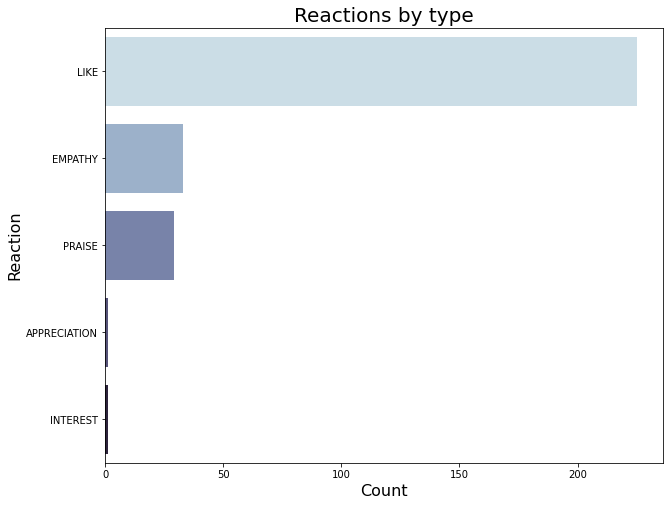

In [138]:
plt.figure(figsize=(10,8))
sn.countplot(data = reactions, y = 'Type', palette='ch:s=.25,rot=-.25')
plt.xlabel('Count', fontsize=16);
plt.ylabel('Reaction', fontsize=16);
plt.title('Reactions by type', fontsize=20)

In [169]:
like_reactions = reactions.query("Type == 'LIKE'")
like_reactions.head()

,Date,Type,Link
0,2022-09-11 02:49:29,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
1,2022-09-10 14:17:11,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
2,2022-09-10 14:17:04,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
3,2022-09-10 14:16:54,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
4,2022-09-10 04:03:25,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...


In [170]:
like_reactions['Date'] = pd.to_datetime(like_reactions['Date'],format='%m%Y', errors='coerce').dt.to_period('m')

C:\Users\Sajiah Naqib\AppData\Local\Temp\ipykernel_11928\2458880788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  like_reactions['Date'] = pd.to_datetime(like_reactions['Date'],format='%m%Y', errors='coerce').dt.to_period('m')


In [171]:
like_reactions.head()

,Date,Type,Link
0,2022-09,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
1,2022-09,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
2,2022-09,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
3,2022-09,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...
4,2022-09,LIKE,https://www.linkedin.com/feed/update/urn%3Ali%...


In [176]:
count_likes = like_reactions.groupby(like_reactions['Date']).size().reset_index(name = 'count')

In [184]:
count_likes['Date'] = count_likes['Date'].astype(str)

Text(0, 0.5, 'Likes')

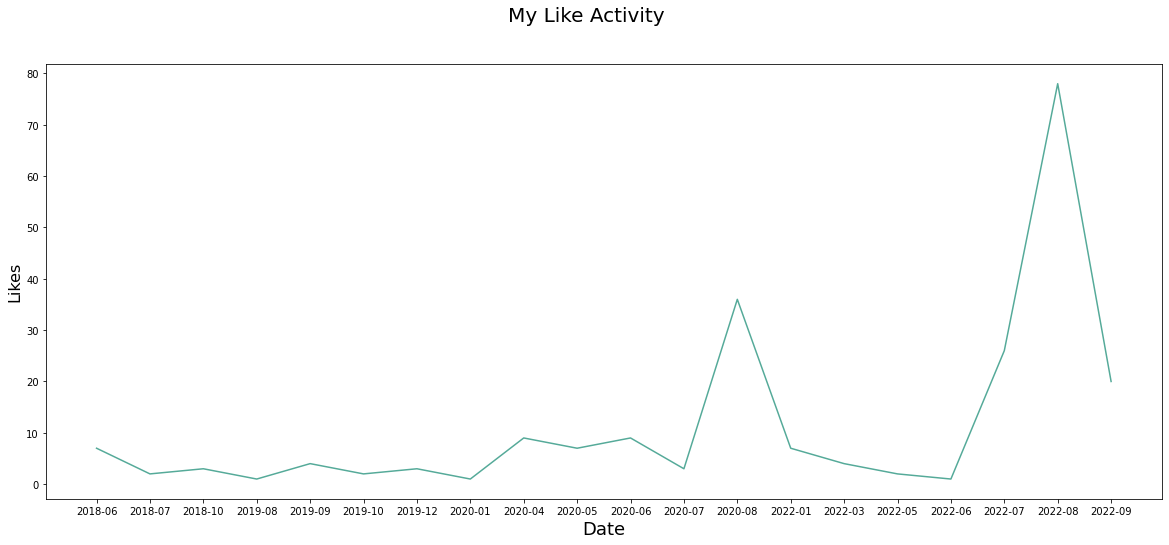

In [195]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(count_likes['Date'],count_likes['count'], color = '#55aa99')
# ax.set_xticks(x)
# ax.set_xticklabels(count_likes['Date'])
# plt.show()
fig.suptitle('My Like Activity', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Likes', fontsize=16)

In [197]:
messages = pd.read_csv('messages.csv')

In [198]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CONVERSATION ID     235 non-null    object
 1   CONVERSATION TITLE  19 non-null     object
 2   FROM                234 non-null    object
 3   SENDER PROFILE URL  208 non-null    object
 4   TO                  234 non-null    object
 5   DATE                235 non-null    object
 6   SUBJECT             24 non-null     object
 7   CONTENT             224 non-null    object
 8   FOLDER              235 non-null    object
dtypes: object(9)
memory usage: 16.6+ KB


In [221]:
mes_from = messages.query('FROM == "Sajiah Naqib"').groupby(messages['FROM']).size().reset_index(name = 'count-from')

In [222]:
mes_from_df = pd.DataFrame(mes_from)
mes_from_df

,FROM,count-from
0,Sajiah Naqib,53


In [223]:
mes_to = messages.query('TO == "Sajiah Naqib"').groupby(messages['TO']).size().reset_index(name = 'count-to')

In [224]:
mes_to

,TO,count-to
0,Sajiah Naqib,181


In [228]:
y = [53, 181]
x = ['Sent', 'Received']

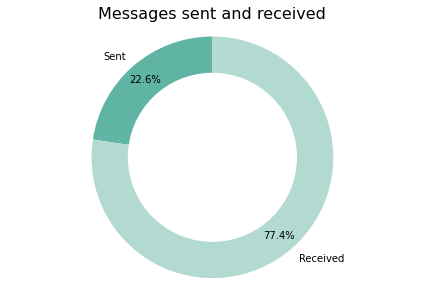

In [230]:
fig1, ax1 = plt.subplots()
# ax1.pie(x, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90,colors=colors,radius=1800)
# ax1.axis('equal')
# plt.title('Invitations sent and received')
# plt.show()

# Pie chart
labels = x
sizes = y
#colors
colors = ['#5fb4a3','#b2dad0']

 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Messages sent and received', fontsize=16)
plt.show()